

Date: october 2022 


Introduction to scanpy: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

# Load tools

In [1]:
import scanpy as sc
import anndata as ad
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys
import pandas as pd
import numpy as np

In [3]:
import gzip

In [4]:
#https://stackoverflow.com/questions/71106940/cannot-import-name-centered-from-scipy-signal-signaltools
import scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [5]:
from matplotlib.pyplot import imshow
%matplotlib inline

In [6]:
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi= 80)

scanpy==1.8.2 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.9.3 pandas==1.5.2 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


In [7]:
file_path='/oak/stanford/groups/cgawad/home/Cancer_Studies/SC_RNA_SEQ/ALSF_AML/scanpy/H5AD/'

In [8]:
Combo=sc.read_h5ad(file_path +"ALSF_AML_total_3500_Muno_rna.h5ad")

In [9]:
Combo.uns['log1p']["base"] = None

In [23]:
HBM=Combo[np.logical_not(Combo.obs["lineage"].isin(['AML',
                                                    #'AML-B',
                                             'AML-Ery',
                                             'AML-Mono',
                                             # 'AML-T',
                                              'AML-NK'
                                                                   # 'B',
                                                                   # 'Erythrocytes',
                                                                   # 'Monocyte',
                                                                  # 'NK',
                                                                  # 'T',
                                                                  # 'PlasmaB'
                                             ]))]


In [24]:
AML=Combo[(Combo.obs["lineage"].isin(['AML','0_HSPC'])) | (Combo.obs["SampleType"].isin(['HealthyBM']))]


AML_2=AML[np.logical_not(AML.obs["lineage_Sample"].isin(['AML','AML-B',
                                                                    'AML-Ery',
                                                                    'AML-Mono',
                                                                    'AML-T',
                                                                   # 'B',
                                                                   # 'Erythrocytes',
                                                                   # 'Monocyte',
                                                                  # 'NK',
                                                                  # 'T',
                                                                   'PlasmaB']))]



In [23]:
marker_genes_dict = {
    'NK': ['SH2D1B', 'FGFBP2', 'KLRF1', 'KLRD1'],
    'Naïve_T': ['TRABD2A', 'CD27',"CAMK4"],
    'PlasmaB': ['SDC1', 'BHLHA15', 'IGHA2', 'TNFRSF17', 'TNFRSF13B'],
   # 'pDC': ['EPHB1', 'CLEC4C', 'LILRA4'],
    'B':['FCRLA', 'MME', 'EBF1', 'PAX5', 'DTX1', 'IGHV5-78', 'IGLC1'],
   

    'Myeloid_Pro': ['SERPINB10', 'RETN', 'MCEMP1'],
    #'mDC': ['CD1C', 'ENHO', 'CLEC10A'],
    'Monocytes': ['RBP7', 'CD14', 'PLBD1', 'FPR1'],
  #  'CD16Mono':['LYPD2','HES4', 'C1QA', 'FCGR3A'],
    'Erythrocytes':['PKLR', 'FAM178B', 'NMU', 'NECAB1', 'KRT13'],
     #'0_HSPC':['CHRM3', 'PLOD2', 'MYCT1', 'MAGI2-AS3', 'HLF', 'AC011139.1', 'AVP', 'CYYR1', 'LDOC1'],
 #'AML':['KYNU', 'SHOX2', 'COL23A1', 'PTGDS', 'CCNA1', 'PCAT18', 'APOC2'], 
   
}

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_lineage']`
categories: 0_HSPC, AML, AML-B, etc.
var_group_labels: NK, Naïve_T, PlasmaB, etc.


/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


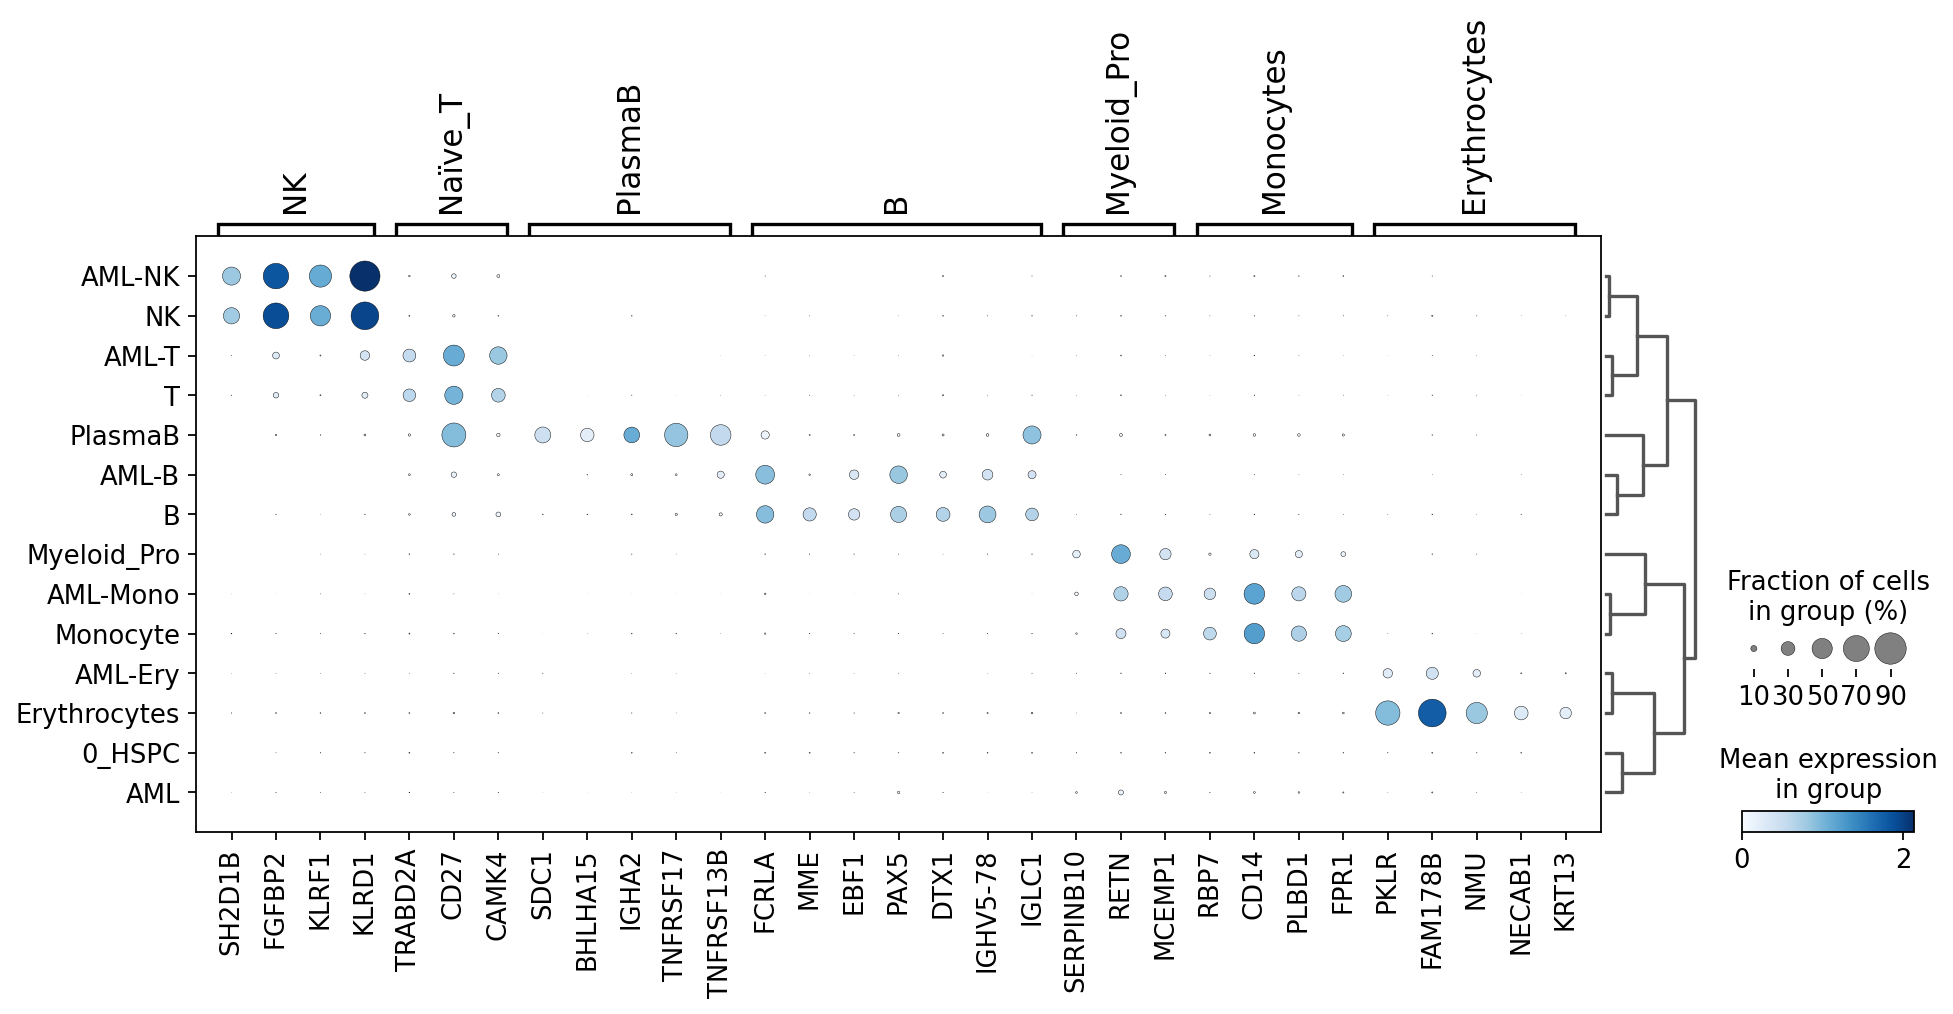

In [24]:
sc.pl.dotplot(Combo, marker_genes_dict, 'lineage', 
              dendrogram=True,cmap='Blues',
             save='_ALSF_AML_Combo_Gene_marker.pdf')

In [25]:
marker_genes_dict = {
'0_HSPC':['CHRM3', 'PLOD2', 'MYCT1', 'PREX2', 'BEND7', 'PRKG1', 'HLF', 'AC011139.1', 'SLC1A6', 'AVP', 'CYYR1',],
 'AML':['SHOX2', 'COL23A1', 'PTGDS', 'WT1', 'CCNA1', 'POU4F1', 'PPP1R27', 'PCAT18', 'APOC2', 'GGT5'], 
   
}

categories: 0_HSPC, AML, AML-B, etc.
var_group_labels: 0_HSPC, AML


/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


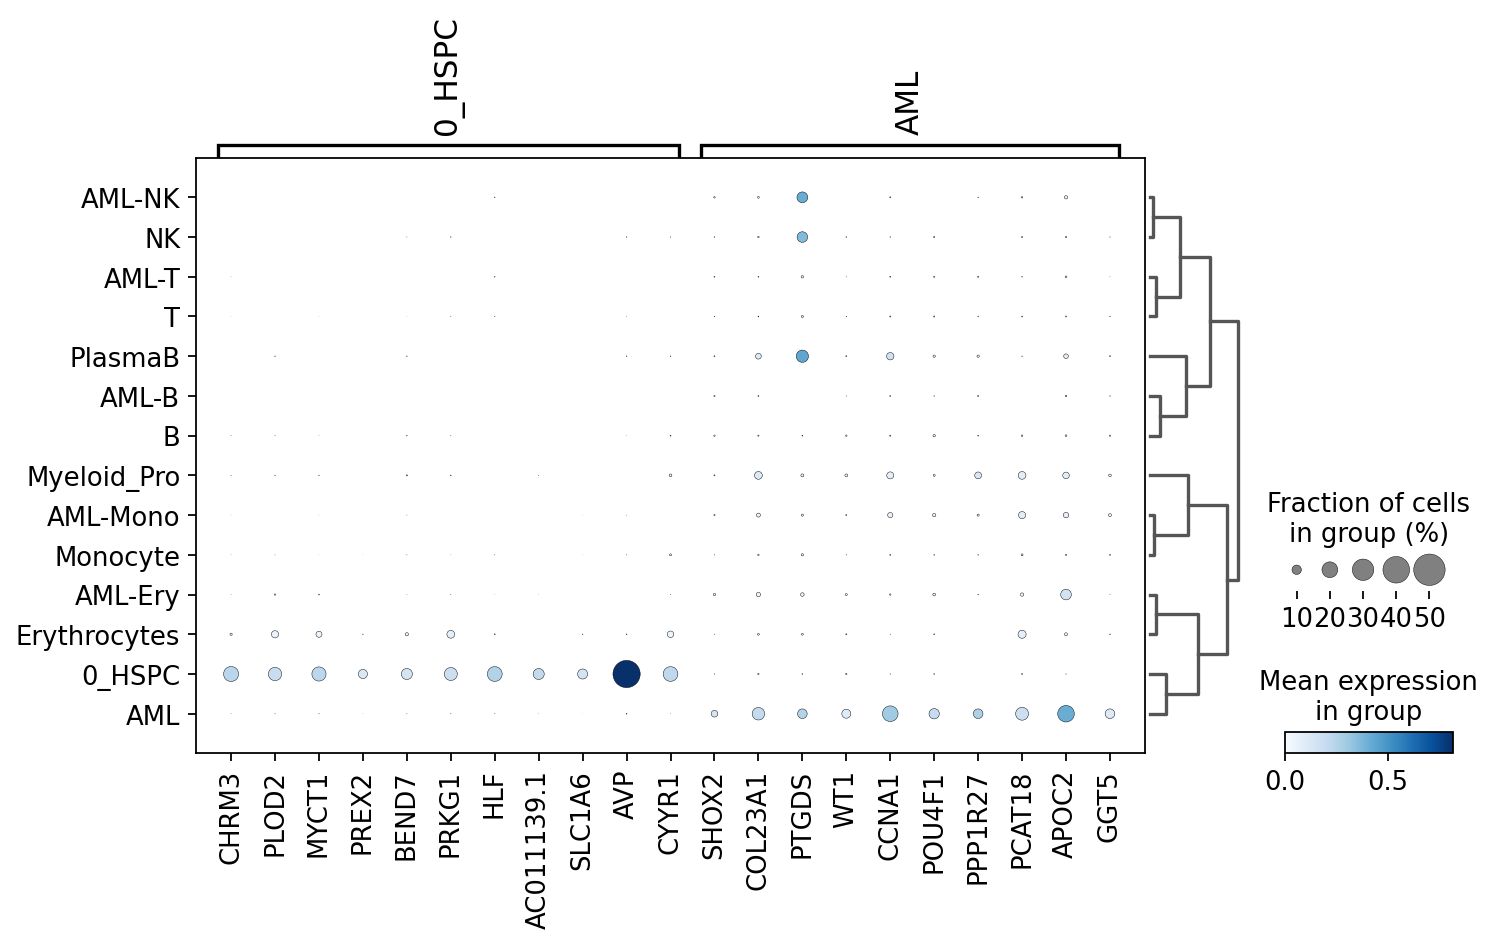

In [28]:
sc.pl.dotplot(Combo, marker_genes_dict, 'lineage', 
              dendrogram=True,cmap='Blues',
             save='_ALSF_AML_HSPC_AML_Gene_marker_Lineage.pdf')

In [11]:
marker_genes_dict = {
'AML_Population':["ENO1",
"ITGA4",
"CD74",
"EGFL7",
"CD44",
"CD63",
"SPN",
"TYROBP",
"MSN",
'CSF3R'], 
'AML_Prognosis':["TNFRSF14","CD34","ITGA6","TFPI", "CD38","PROM1","SLC38A1","ANPEP", "MBP","NECTIN2"]
}

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_lineage']`
categories: 0_HSPC, AML, AML-B, etc.
var_group_labels: AML_Population, AML_Prognosis


/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


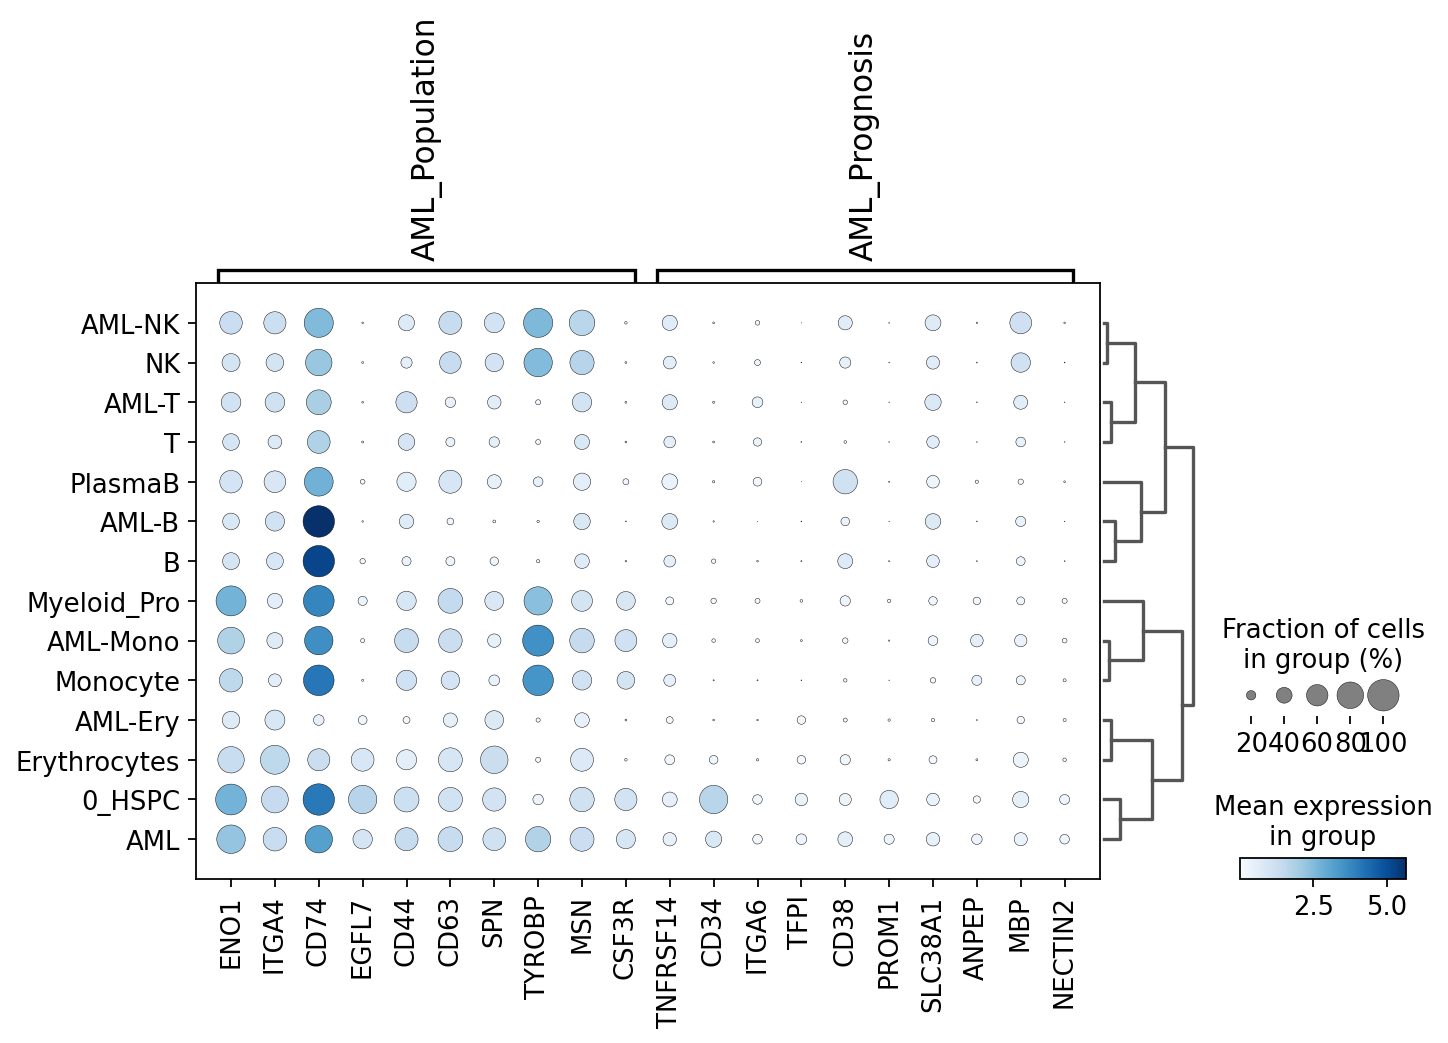

In [12]:
sc.pl.dotplot(Combo, marker_genes_dict, 'lineage', 
              dendrogram=True,cmap='Blues',
             save='_ALSF_AML_HSPC_AML_Gene_marker_Top10.pdf')

In [ ]:
sc.pl.umap(Combo, color=['ADRB2',
 'AMN',
 'ANGPT2',
 'APOC2',
 'AR',
 'ARTN',
 'BGLAP',
 'CD180',
 'CD93',
 'CD96',
 'CES1',
 'COL9A2',
 'CSF1R',
 'CSF2RA',
 'ECM1',
 'F13A1',
 'FCGR1A',
 'FCGR2A',
 'GGT5',
 'HRH2',
 'ICAM1',
 'IL13RA1',
 'IL5RA',
 'ITGAX',
 'JAG1',
 'LAMA5',
 'LAMB2',
 'LILRA5',
 'LILRB4',
 'LTK',
 'LY86',
 'MAMDC2',
 'MSLN',
 'NRG4',
 'NRXN2',
 'OSCAR',
 'PTAFR',
 'PTGDS',
 'RNASE3',
 'SERPINA1',
 'SIGLEC12',
 'SLC15A2',
 'STAB1',
 'THSD7A',
 'TLR2',
 'TPSAB1',
 'TPSD1',
 'VSTM1',
 'ZG16B'], frameon=False,
           cmap='Reds', ncols=7,
          save='_Combo_AML_unique_gene.pdf'
          )

In [ ]:
sc.pl.umap(Combo, color=['IL3RA', 'CD33','TFRC','ITGA6'], frameon=False,
           cmap='Reds', ncols=5,
          save='_Combo_gene_list_from_CSF_MCCF1.pdf'
          )

In [ ]:
Unique_list=['PTAFR', 'COL9A2', 'ARTN', 'FCGR1A', 'ECM1', 
             'BGLAP', 'FCGR2A', 'IL5RA', 'LAMB2', 'STAB1', 'CD96', 'SLC15A2',
             'TLR2', 'CD180', 'ADRB2', 'CSF1R', 'HRH2', 'F13A1', 'LY86', 'THSD7A', 'ANGPT2', 
             'MAMDC2', 'PTGDS', 'NRXN2', 'RNASE3', 'SERPINA1', 'AMN', 'LTK', 'NRG4', 'MSLN', 'TPSAB1',
             'TPSD1', 'ZG16B', 'ITGAX', 'CES1', 'ICAM1', 'APOC2', 
             'SIGLEC12', 'VSTM1', 'OSCAR', 'LILRA5', 'LILRB4', 'JAG1', 'CD93', 'LAMA5', 'GGT5',
             'CSF2RA', 'AR', 'IL13RA1']
Unique_list = sorted(Unique_list)

In [ ]:
Unique_list_mcc=['PTAFR', 'COL9A2', 'ARTN', 
             'SLC15A2', 'HRH2', 'NRXN2', 
             'RNASE3', 'NRG4', 'ITGAX',
             'CES1', 'ICAM1', 'SIGLEC12',
             'LILRB4', 'GGT5', 'CSF2RA']
Unique_list_mcc = sorted(Unique_list_mcc)

In [ ]:
Unique_CCI_list=['HLA-F', 'TNFSF12', 'CD70', 'PTGDS', 'TNF', 'ICAM1', 'LTA', 'NT5E', 'TNFRSF1B', 'TNFSF8', 
                 'IGF2', 'CCL5', 'LILRB2', 'ADORA2B',
                 'TNFRSF25', 'ITGAL', 'OXER1', 'CCR3', 'CCR5', 'GPR75', 'ADORA2A', 'GABBR1']
Unique_CCI_list = sorted(Unique_CCI_list)

In [ ]:
Unique_PPAC_HSPC_list=['LTB', 'PECAM1', 'TBXAS1', 
                 'CD200', 'TNFSF10', 'TNFRSF12A', 'NR1H3',
                 'IL2RG', 'ADORA2A', 'PLXNC1', 'CYSLTR1',
                 'HAVCR2', 'TBXA2R', 'ITGA5','DAGLB','DPEP2']
Unique_PPAC_HSPC_list = sorted(Unique_PPAC_HSPC_list)

In [ ]:
sc.pl.dotplot(AML_2,Unique_CCI_list, groupby='lineage_Sample',dendrogram=True,
             save='_Combo_PAC_anno_CCI_Unique_gene_by_Sample.pdf')

In [ ]:
sc.pl.dotplot(AML_2,Unique_PPAC_HSPC_list, groupby='lineage_Sample',dendrogram=True,
             save='_Combo_PPAC_HSPC_Unique_CCI_gene_by_Sample.pdf')

In [ ]:
sc.pl.dotplot(AML_2,Unique_PPAC_HSPC_list, groupby='PAC_anno',dendrogram=True,
             save='_Combo_PPAC_HSPC_Unique_CCI_gene_by_PAC_anno.pdf')

In [ ]:
sc.pl.dotplot(Combo,Unique_list, groupby='Sample',dendrogram=True,
             save='_Combo_PAC_anno_AML_unique_gene_by_Sample.pdf')

In [ ]:
sc.pl.dotplot(AML_2,Unique_list_mcc, groupby='PAC_anno',dendrogram=True,
             save='_Combo_Unique_list_mcc_AML_unique_gene_by_PAC_anno.pdf')